# Visualización de datos para regresión

En este laboratorio, se aprende a usar Python para visualizar y explorar datos. Este proceso también se conoce como **análisis exploratorio de datos**.

Antes de crear modelos analíticos, un científico de datos debe desarrollar una comprensión de las propiedades y relaciones en un conjunto de datos. 

Hay dos objetivos para la exploración y visualización de datos. 

- Primero para comprender las relaciones entre las columnas de datos. 
- En segundo lugar, para identificar características que pueden ser útiles para predecir etiquetas en proyectos de aprendizaje automático. Además, se pueden identificar características colineales redundantes. 

Por lo tanto, la visualización para la exploración de datos es una habilidad esencial en la ciencia de datos.

En este módulo, se explora dos conjuntos de datos. Específicamente, en este laboratorio, su primer objetivo es explorar un conjunto de datos que incluya información sobre los **precios de los automóviles**. 

En otros laboratorios, utilizará lo que aprenda a través de la visualización para crear una solución que prediga el precio de un automóvil en función de sus características. 

Este tipo de modelo predictivo, en el que intenta predecir un valor numérico real, se conoce como **regresión**; y se discutirá con más detalle más adelante. 

__OBJETIVO__

Por ahora, el enfoque de este laboratorio es explorar visualmente los datos para determinar qué características pueden ser útiles para predecir los precios de los automóviles.prices.

Esta lección se divide en varias partes. En cada parte, se aprende a utilizar las herramientas de visualización disponibles en Python para explorar datos complejos. Específicamente:

- ** Resumir y manipular datos **:
  * ¿Qué tan grande es?
  * ¿Qué columnas son de interés?
  * ¿Cuáles son las características de los datos derivados de las estadísticas de resumen y los recuentos

  
- **Desarrollo de múltiples vistas de datos complejos** utilizando múltiples tipos de gráficos. La exploración de datos complejos requiere múltiples vistas para comprender las diversas relaciones. Es imposible desarrollar una comprensión completa a partir de unas pocas parcelas.
- **Descripción general de Matplotlib, el trazado de Pandas y Seaborn**, que son paquetes de trazado de Python de uso común.
- **Descripción general de los tipos de gráficos univariados** es una revisión de la creación de estos gráficos básicos utilizando tres paquetes de Python. Estos tipos de gráficos le permiten estudiar las propiedades de distribución de las variables en su conjunto de datos.
- **Descripción general de los tipos de gráficos bidimensionales** es una revisión de la creación de tipos de gráficos básicos utilizados para construir visualizaciones. Estos gráficos muestran naturalmente la relación entre dos variables en la pantalla de gráficos por computadora en 2-d.
- **Estetica o visualización formalizada** es una descripción general de cómo proyectar dimensiones adicionales de la parcela utilizando la estética de la parcela. El uso de la estética proporciona un método para proyectar dimensiones adicionales en la pantalla de gráficos por computadora 2-d.
- **El trazado de facetas**, también conocido como trazado condicionado o trazado de celosía, introduce un método poderoso para visualizar datos de dimensiones superiores. Las matrices de gráficos de subconjuntos de datos se organizan en la pantalla de gráficos por computadora 2-d.
- **Uso de métodos Matplotlib** para agregar atributos a los gráficos, como títulos y etiquetas de ejes.

## Cargando el conjunto de datos

Antes de que puedas iniciar la visualización, debes cargar el conjunto de datos. El código en la celda a continuación carga los datos y realiza una limpieza de datos. Trabajarás con métodos de preparación y limpieza de datos en otros laboratorios.

Como primer paso, ejecuta el código en la celda a continuación para importar los paquetes de Python que necesitará para el resto de este cuaderno. Observe el comando "mágico" de IPython `%matplotlib inline`. El `%` le dice al intérprete de Python que este es el comienzo de un comando mágico; un comando que configura el entorno de ejecución. El `matplotlib inline` indica que desea mostrar gráficos en línea dentro del notebook. Ejecuta este código

In [2]:
import numpy as np #importa la biblioteca de tratamiento de datos. Explicación:
import pandas as pd #importa la biblioteca de tratamiento de datos. Explicación: 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

La función clean_auto_data () a continuación prepara el conjunto de datos. La preparación de datos se explica con más detalle en el módulo siguiente.

Por ahora, ejecute el código en la celda a continuación para cargar y preparar el conjunto de datos de precios automotrices.

In [5]:
auto_prices = pd.read_csv('Automobile price data _Raw_.csv') #archivo de entrada, nos conectamos como read de Pandas

def clean_auto_data(auto_prices):
    'Lo que realiza esta función es la limpieza' 
    import pandas as pd
    import numpy as np
    
    #Primer paso: cambiar nombres de columnas
    cols = auto_prices.columns ## Lee nombres y lo carga en una variable
    auto_prices.columns = [str.replace('-', '_') for str in cols] ## Cambia el '-' por '_' 
    
    #Sefundo paso: cambiar nombres de columnas
    ## Busca columnas sin datos
    ## Borra esas filas, las que tienen el valor '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan # Busca los nan, datos que no tienen valor almacenado
    auto_prices.dropna(axis = 0, inplace = True) # Borra lienas (axis=0) vacías

    ## Transformar los tipos de datos
    ## Convertir algunas columnas en númericas
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])

    return auto_prices # Carga la función
auto_prices = clean_auto_data(auto_prices) # Pasa a la variable auto_prices la ejecución de la función, con parametro

print(auto_prices.columns) #muestra el resultado

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


Observe los nombres de las columnas. La mayoría de estos nombres son interpretables por humanos y le dan una idea de la información de este conjunto de datos. La columna `precio` es la **etiqueta**, la variable que está tratando de predecir.

## Explorando los datos

Con el conjunto de datos cargado, ahora explorará algunas propiedades básicas utilizando métodos de resumen.

Primero, examinamos el encabezado (las primeras filas, auto_prices.head()) del dataframe de Panda. 

Para tener una idea del contenido ejecutamos el código en la celda de abajo

In [7]:
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Desplácese y examine el contenido de cada columna de este conjunto de datos. Algunas columnas tienen **valores numéricos** y otras columnas contienen **cadenas de variables**. Algunas de las columnas numéricas parecen contener **valores enteros** y otras tienen **números de coma flotante**. En el aprendizaje automático, tratamos las columnas de cadenas como **variables categóricas**.

Para comprender mejor los tipos de datos en este conjunto de datos, ejecute el código en la celda de abajo para imprimir el atributo `dtypes` de cada columna.

In [8]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

Estos resultados confirman las operaciones anteriores. Una columna de tipo `objeto` contiene una cadena de texto.

Pandas proporciona una forma sencilla de calcular y mostrar estadísticas de resumen para columnas numéricas mediante el método `describe`. Se ejecute el código en la celda a continuación y examinamos los resultados para cada columna numérica.

In [9]:
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Hay mucha información aquí. Para cada columna numérica se imprime lo siguiente:
- El recuento de casos en la columna. En este caso, todos los recuentos son iguales. Lo que da idea de la consistencia.
- La media y la desviación estándar de los valores de la columna. Observe que existe una amplia gama de medias y escalas (valores de desviación estándar) en estas columnas.
- El mínimo y máximo de los valores de la columna. Nuevamente, el rango extremo de estas columnas varía bastante.
- Se muestran los cuartiles, 25%, 50% o valor mediano y 75%. Para muchas de estas columnas, como curb_weight y el valor de la etiqueta, price, existe una diferencia significativa entre los valores de la media y la mediana. Cuando el valor de la mediana es menor que la media, esto indica que la distribución está sesgada a la derecha, es decir, con una cola que se extiende hacia la derecha.

Ahora, consideraremos cómo podemos comprender las distribuciones de variables categóricas. El uso de una sola línea de código Pandas nos ermite calcular y mostrar una tabla de frecuencias utilizando el método value_counts. Una tabla de frecuencia muestra la frecuencia de cada categoría única de una variable categórica.

El código de la celda imprime una tabla de frecuencias para obtener una lista de columnas categóricas. Ejecute este código y examine los resultados.

In [11]:
def count_unique(auto_prices, cols): # Dataframe y sobre que objetos
    for col in cols:
        print('\n' + 'Número de casos por la columna ' + col)
        print(auto_prices[col].value_counts()) #cuanta la aparición de cada valor

cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
            'fuel_system']
count_unique(auto_prices, cat_cols)


Número de casos por la columna make
toyota           32
nissan           18
mitsubishi       13
mazda            13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

Número de casos por la columna fuel_type
gas       175
diesel     20
Name: fuel_type, dtype: int64

Número de casos por la columna aspiration
std      159
turbo     36
Name: aspiration, dtype: int64

Número de casos por la columna num_of_doors
four    112
two      81
?         2
Name: num_of_doors, dtype: int64

Número de casos por la columna body_style
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

Número de casos por la columna drive_wh

Hay algunos datos básicos que puede derivar de estas tablas de frecuencia.

1. Algunas de estas variables tienen una gran cantidad de categorías. Cuando se realiza aprendizaje automático con un conjunto de datos de entrenamiento de tamaño limitado, tener una gran cantidad de categorías es problemático, ya que habrá pocas muestras por categoría. *Por ejemplo, observe cuántas marcas de automóviles están representadas. Solo hay 1 Mercurio y 2 Isuzus. Por lo tanto, cualquier propiedad estadística para estas categorías estará mal determinada.*
2. Existen importantes desequilibrios en los recuentos de algunas categorías. Ya ha visto que existen diferencias significativas en los recuentos de automóviles por **marca**. En otro ejemplo, solo hay 3 coches con **motor trasero**. Una vez más, cualquier propiedad estadística de los automóviles con motor trasero estará mal determinada.
3. Algunas variables categóricas podrían convertirse razonablemente en variables numéricas. Por ejemplo, el número de cilindros es actualmente una variable categórica, pero podría transformarse en una variable numérica.

***
**Nota:** Hay otros dos casos a considerar con las transformaciones entre variables numéricas y categóricas.
1. Algunas variables categóricas indican rango, por ejemplo, **grande**, **mediano** y **pequeño**. En estos casos, puede ser mejor transformar estos valores a niveles numéricos.
2. Así como puede ser útil transformar una variable categórica en numérica, puede resultar ventajoso convertir una variable numérica en una variable categórica. Este es particularmente el caso si los valores numéricos simplemente codifican una categoría sin un significado particular.
***

## Visualización de datos de automóviles para regresión
Python admite la biblioteca matplotlib; que proporciona amplias capacidades gráficas. Además, la biblioteca Python Pandas y la biblioteca Seaborn agregan una capacidad de gráficos de mayor nivel. Pandas y Seaborn abstraen muchos de los detalles de bajo nivel. Como se ve, dado que estas bibliotecas se basan en Matplotlib, siempre puede agregar los detalles necesarios. Estas características hacen de Python un lenguaje útil para crear visualizaciones de sus datos al explorar las relaciones entre las características de los datos. Además, puede identificar características que pueden ser útiles para predecir etiquetas en proyectos de aprendizaje automático.

## Visualización de distribuciones

Con un conocimiento básico de los datos establecidos en mente, es hora de profundizar un poco más. 
En esta sección, se aplicara métodos para explorar las distribuciones de datos categóricos y numéricos.

### Gráfica de barras

Como primer paso, utilizará **gráficos de barras** para examinar las *distribuciones de frecuencia* de las variables categóricas. 
Un gráfico de barras muestra las frecuencias de cada categoría. En la mayoría de los casos, las categorías deben **ordenarse por frecuencia**; ascendente o descendente. Ordenar categorías por frecuencia ayuda en la interpretación del espectador.

Ejecutamos la función en la celda a continuación para realizar el siguiente procesamiento:
1. Repite la lista de columnas.
2. La figura y los ejes se definen utilizando métodos Matplotlib.
3. Se calculan los recuentos o frecuencias de las categorías.
4. El diagrama de barras se crea utilizando el método Pandas `plot.bar`. Observe que el argumento de color se establece en azul. El uso predeterminado de ** colores múltiples sin motivo alguno distrae y no contribuye a la interpretación **.
5. Las anotaciones se agregan al gráfico utilizando métodos Matplotlib.

Dado que el trazado de Pandas se basa en Matplotlib, siempre es posible agregar atributos de trazado adicionales utilizando los métodos de este paquete.

Ejecute este código y examine los resultados.

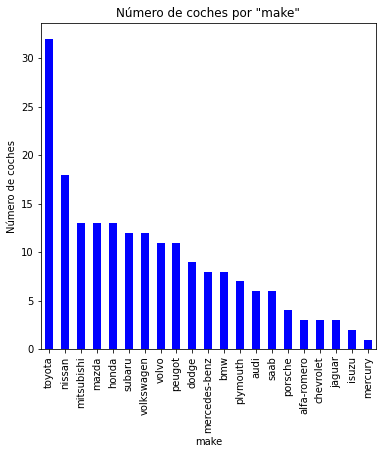

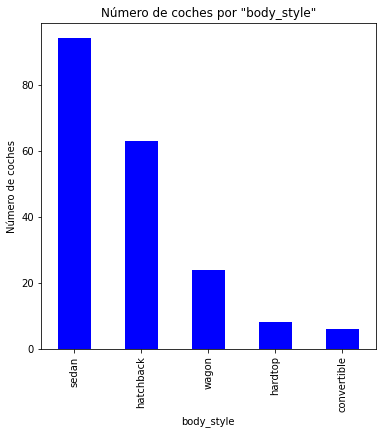

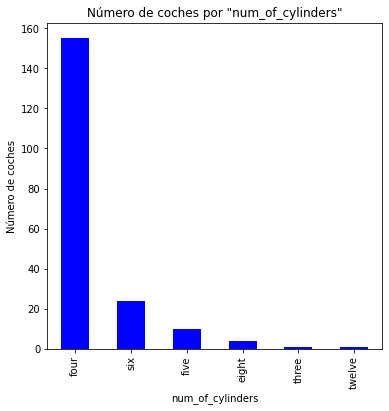

In [15]:
def plot_bars(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define el área del gráfico
        ax = fig.gca() # define los ejes    
        counts = auto_prices[col].value_counts() # busca el número de ocurrencia por categoía
        counts.plot.bar(ax = ax, color = 'blue') # Usamos el método plot.bar para las ocurrencias encontradas
        ax.set_title('Número de coches por ' +'"'+col+'"') # Da titulo al gráfico
        ax.set_xlabel(col) # Da el nombre al eje x
        ax.set_ylabel('Número de coches')# Da nombre al eje y
        plt.show()

plot_cols = ['make', 'body_style', 'num_of_cylinders']
plot_bars(auto_prices, plot_cols)    

Estos gráficos muestran la amplia gama de frecuencias para las variables categóricas representadas. Esto será un problema con el modelado, ya que hay muy pocos miembros de algunas clases.

### Histogramas

**Los histogramas** están relacionados con gráficos de barras. Mientras que un gráfico de barras muestra los recuentos de categorías únicas, un histograma muestra el **número de valores de datos dentro de un contenedor** para una **variable numérica**. Los contenedores dividen los valores de la variable en segmentos iguales. El eje vertical del histograma muestra el recuento de valores de datos dentro de cada contenedor.

El siguiente código sigue la misma receta básica utilizada para el diagrama de barras para crear un histograma. En este caso, se utiliza el método Pandas `plot.hist`.


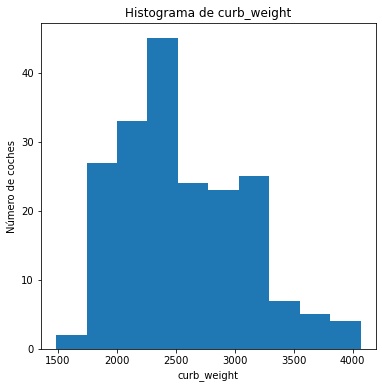

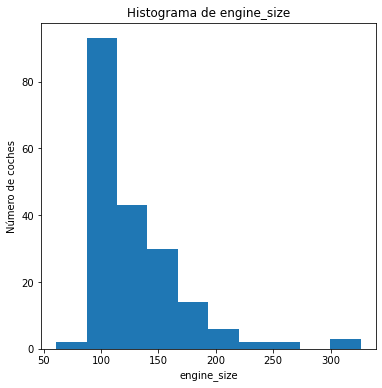

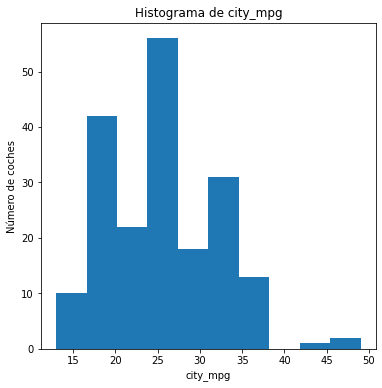

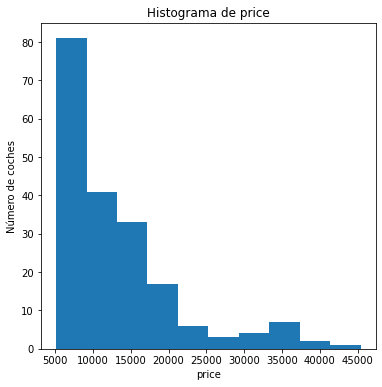

In [17]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define el área del gráfico
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Usa el método plot.hist en un subconjunto en el data frame
        ax.set_title('Histograma de ' + col) # Da título al gráfico
        ax.set_xlabel(col) # Da nombre a x
        ax.set_ylabel('Número de coches')# Da nombre a y
        plt.show()
        
num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price']    
plot_histogram(auto_prices, num_cols)

Algunas de estas variables tienen distribuciones que están sesgadas hacia la derecha o hacia el lado derecho. Esta distribución sesgada afectará las estadísticas de cualquier modelo de aprendizaje automático.

### Gráficas de densidad de kernel e introducción a Seaborn

Hasta ahora ha estado trabajando exclusivamente con los métodos de trazado en Pandas. Ahora, utilizará el paquete Seaborn. Seaborn es un paquete de Python más nuevo que abstrae gráficos matplotlib de nivel inferior. Seaborn también implementa algunos tipos de gráficos de vanguardia adicionales.

Los gráficos de **estimación de densidad de kernel** o **kde** son similares en concepto a un histograma. Un gráfico de densidad de kernel muestra los valores de una curva de densidad suavizada de los valores de los datos. En otras palabras, la gráfica de densidad del kernel es una versión suavizada de un histograma.
 
El código en la celda a continuación crea un gráfico de densidad de kernel siguiendo el código utilizado anteriormente. El uso de Seaborn agrega lo siguiente al código:

1. Define un estilo para la cuadrícula del gráfico.
2. Define el tipo de gráfico con "distplot" utilizando la columna de tamaño del **motor** como argumento. En este caso, no se traza ningún histograma. A lo largo del eje horizontal se muestra una 'sombra' que muestra la ubicación de los puntos de datos en el eje.
3. Una vez más, los métodos de Matplotlib se utilizan para agregar las anotaciones al gráfico. Seaborn se basa en Matplotlib, por lo que siempre es posible mezclar métodos de Matplotlib.
 
****
**Nota:** Dependiendo de su plataforma y versiones de numpy, es posible que vea una advertencia de obsolescencia. Puede ignorar con seguridad esta advertencia.
****

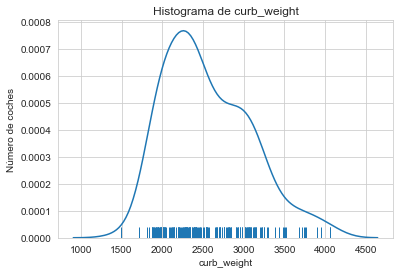

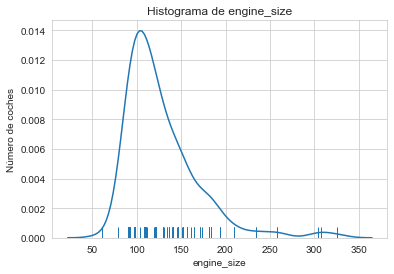

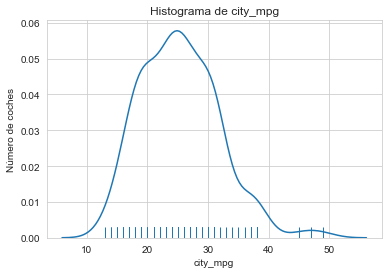

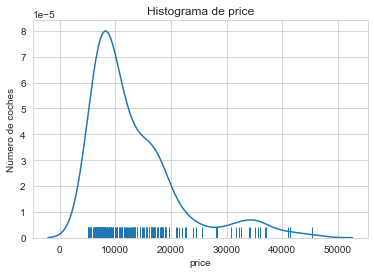

In [18]:
def plot_density_hist(auto_pries, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histograma de ' + col) # Título del gráfico
        plt.xlabel(col) # Nombre para x
        plt.ylabel('Número de coches')# Nombre para y
        plt.show()
        
plot_density_hist(auto_prices, num_cols)        

Los gráficos kde muestran las mismas propiedades de asimetría del histograma. La sombra muestra una vista diferente de la densidad de los puntos de datos en el eje. Algunos detalles son más evidentes en esta vista.

### Combina histogramas y kdes

La combinación de un histograma y un kde puede resaltar diferentes aspectos de una distribución. Esto es fácil de hacer con Seaborn, como lo demuestra el siguiente código. En este caso, el número de bins para el histograma se ha aumentado de 10 a 20.

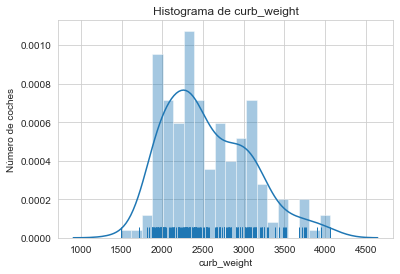

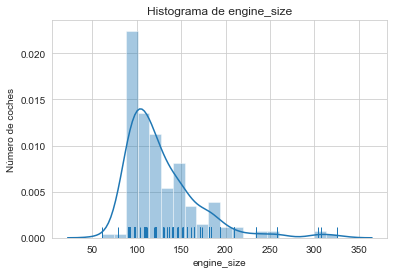

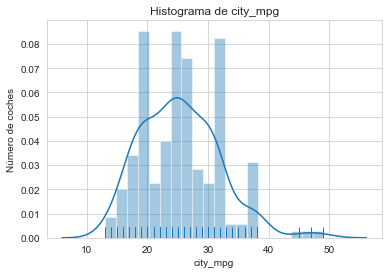

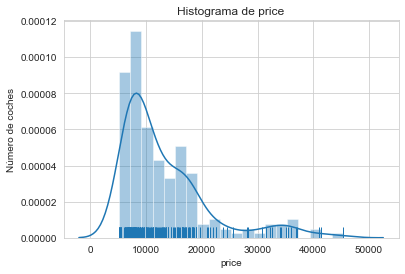

In [19]:
plot_density_hist(auto_prices, num_cols, bins = 20, hist = True)        

Esta vista destaca el hecho de que algunas características tienen **distribuciones multimodales**. Este hecho, tendrá implicaciones para las estadísticas de cualquier modelo de aprendizaje automático entrenado con estos datos.

## Parcelas bidimensionales

Después de haber utilizado estadísticas de resumen y varios métodos de gráficos unidimensionales para explorar datos, continuará esta exploración utilizando **gráficos bidimensionales**. Las gráficas bidimensionales le ayudan a desarrollar una comprensión de la **relación entre dos variables**. Para el aprendizaje automático, la relación de mayor interés se encuentra entre las **funciones** y la **etiqueta**. También puede ser útil examinar las relaciones entre características para determinar si las características son covariables o no. Tal procedimiento puede resultar más confiable que simplemente calcular la correlación cuando la relación no es lineal.

### Crear gráficos de dispersión

Los gráficos de dispersión se utilizan ampliamente para examinar la relación entre dos variables. En este caso, las parcelas creadas son de algunas características vs. la etiqueta, precio del auto.

El código en la celda de abajo sigue la receta usada previamente para usar los métodos de trazado de Pandas, usando el método `plot.scatter`. Este método tiene dos argumentos necesarios para los ejes xey. Ejecute este código y examine los resultados.

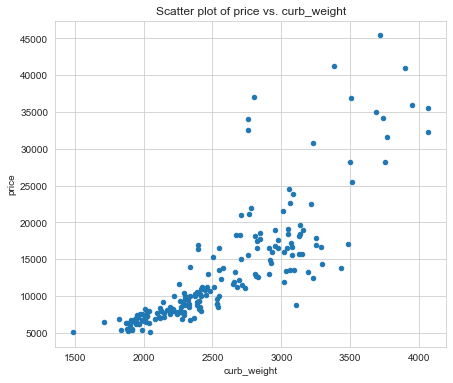

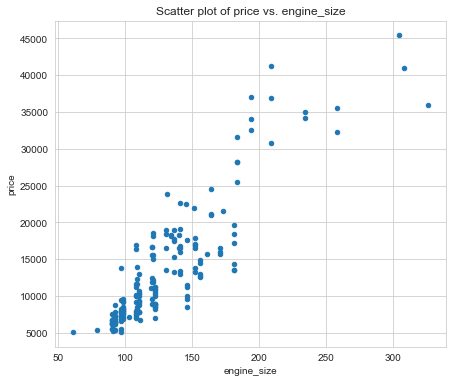

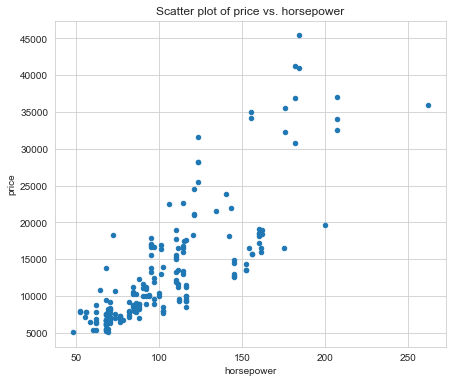

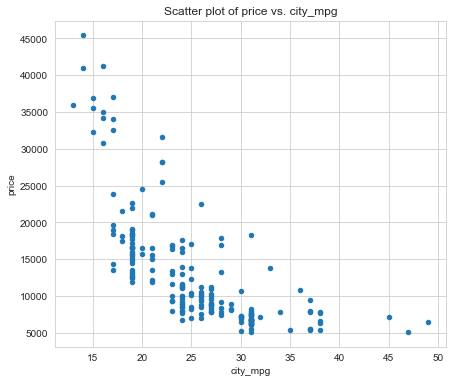

In [20]:
def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define el área del gráfico
        ax = fig.gca() # define los ejes  
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Título del gráfico
        ax.set_xlabel(col) # Nombre para x
        ax.set_ylabel(col_y
                     )# Nombre para y
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols)        

Estos gráficos muestran una fuerte relación entre estas características y la etiqueta. Es probable que estas características sean útiles para predecir el precio de los automóviles. engine_size y horsepower tienen relaciones bastante **lineales** con el precio, mientras que curb_weight y especialmente city_mpg **no lo hacen**.

Parece probable que hoursepower y engine_size sean colineales. Para probar esta hipótesis, ejecutamos el código en la celda de abajo y examine el resultado.

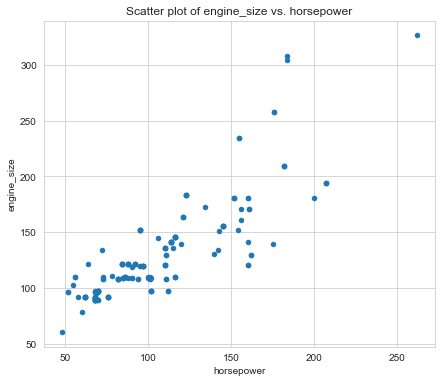

In [21]:
plot_scatter(auto_prices, ['horsepower'], 'engine_size') 

De hecho, estas características parecen linealmente dependientes. Por lo tanto, no querrá usarlos en el mismo modelo de aprendizaje automático.

### Lidiar con la superposición

Examinamos **engine_size** o **city_mpg** frente al precio anterior. Tenga en cuenta que para ciertos tamaños de motor y clasificaciones city_mpg hay numerosos automóviles en un rango de precios estrecho. Aparentemente, los fabricantes de automóviles apuntan a estas características. El resultado es que se trazan muchos puntos uno sobre otro en los diagramas de dispersión, lo que da como resultado **sobreposición**. El trazado excesivo es un problema grave cuando se aplican gráficos de dispersión a grandes conjuntos de datos. Una trama excesiva puede hacer que una trama carezca de sentido o sea ininterpretable.

Afortunadamente, hay varias buenas formas de lidiar con el exceo de marcas:
1. Utilizamos la **transparencia** de los puntos para permitir que la vista vea los puntos. Con una sobreimpresión leve, este enfoque puede ser bastante efectivo.
2. **Gráficos de contorno** o **Gráficos de densidad 2D** muestran la densidad de puntos, tanto como un mapa topográfico muestra la elevación. La generación de contornos tiene una alta complejidad computacional y hace que este método no sea adecuado para conjuntos de datos masivos.
3. **Los gráficos de hexbin** son el análogo bidimensional de un histograma. La densidad del sombreado en las celdas hexagonales indica la densidad de puntos. La generación de *hexbins* es computacionalmente eficiente y se puede aplicar a conjuntos de datos masivos.

El código en la celda a continuación modifica la función de diagrama de dispersión utilizada anteriormente para agregar un argumento de transparencia. 
En gráficos estadísticos, alfa, se especifica el reverso de la transparencia; alpha = 1.0 es opaco, alpha = 0.0 es perfectamente transparente. El código de la celda a continuación usa un alfa bajo de 0.2 (alta transparencia). Ejecute este código y examine los resultados.

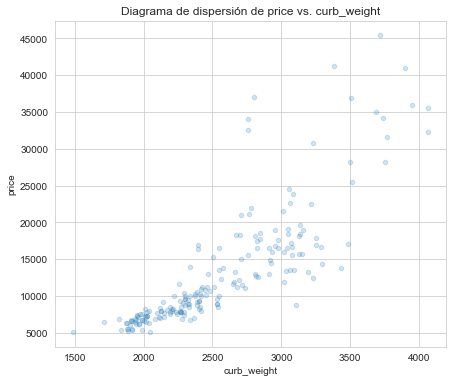

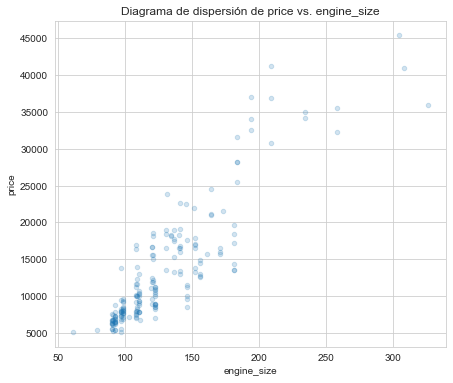

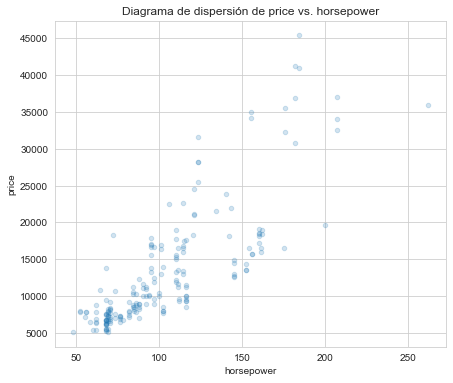

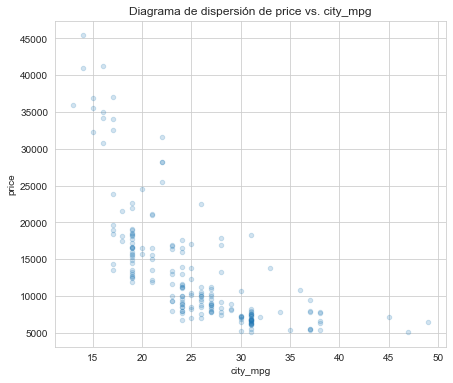

In [24]:
def plot_scatter_t(auto_prices, cols, col_y = 'price', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Diagrama de dispersión de ' + col_y + ' vs. ' + col) # Da el título al gráfico
        ax.set_xlabel(col) # Nombra al eje x
        ax.set_ylabel(col_y)# Nombra al eje y
        plt.show()

plot_scatter_t(auto_prices, num_cols, alpha = 0.2)        

Con la alta transparencia, ahora es posible ver puntos en áreas densas para obtener una mejor vista de los datos.

El uso de la transparencia para la sobreimpresión es útil, pero limitado. Con una gran cantidad de puntos, necesitará otros métodos. El uso de gráficos de contorno o de densidad 2D es una de esas soluciones. El código en la celda de abajo usa la función `joinplot` de Seaborn. Esta gráfica muestra gráficas de KDE 1d junto con la gráfica de conteo que muestra la densidad 2d. Ejecute este código y examine los resultados.

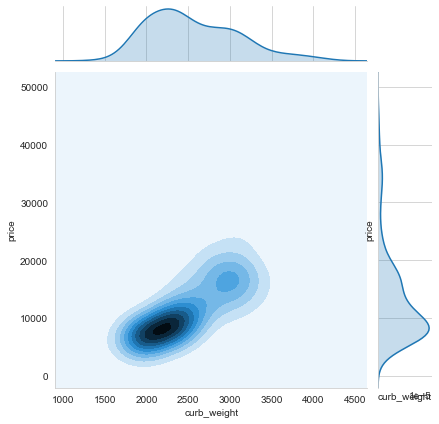

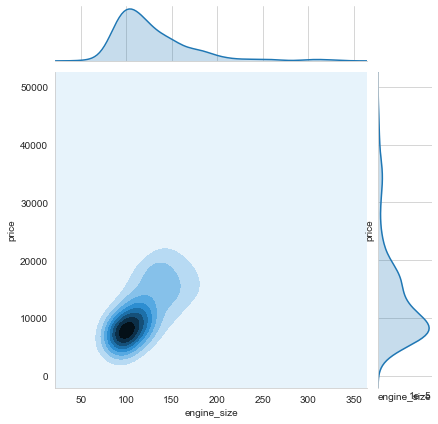

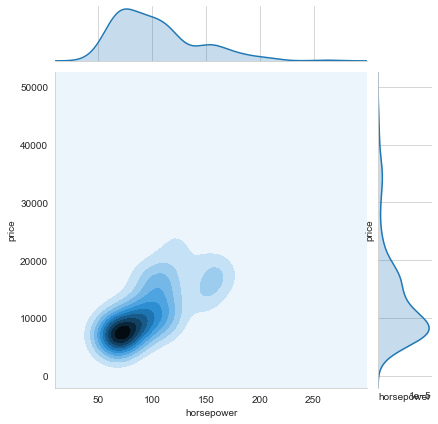

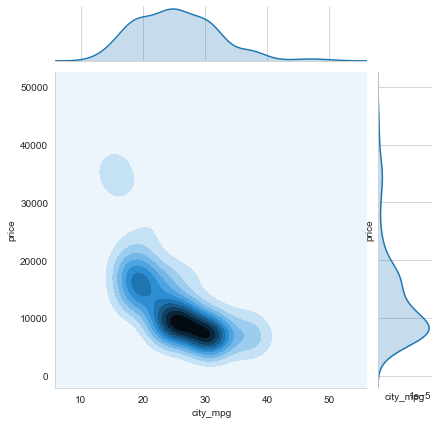

In [25]:
def plot_desity_2d(auto_prices, cols, col_y = 'price', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=auto_prices, kind=kind)
        plt.xlabel(col) # Nombra al eje x
        plt.ylabel(col_y)# Nombra al eje y
        plt.show()

plot_desity_2d(auto_prices, num_cols)      

Estas gráficas de contorno de densidad muestran una vista bastante diferente de la relación entre estas características y la etiqueta. En particular, el comportamiento multimodal 2D es visible para **curb_weight**, **caballos** y particularmente **city_mpg**. Observamos también que se muestra un coeficiente de correlación.

El código en la celda a continuación muestra los gráficos 2d hexbin y los histogramas 1d para las mismas variables. Ejecutamos este código y examinamos los resultados.

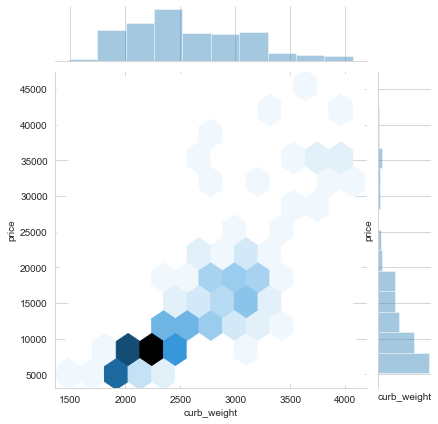

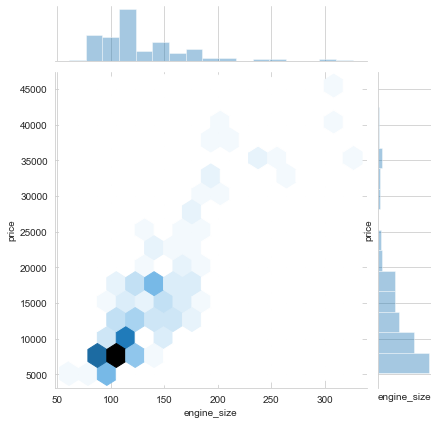

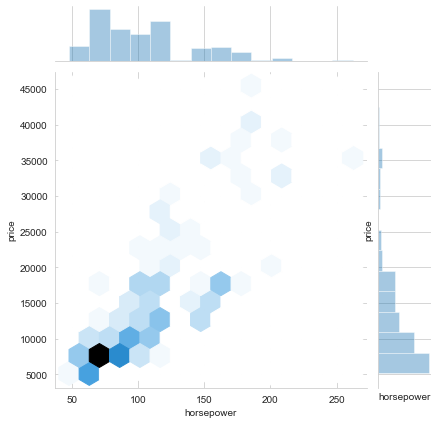

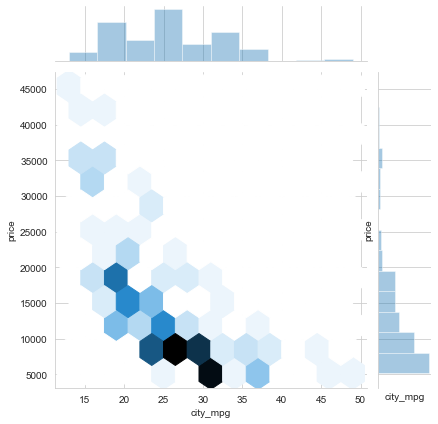

In [15]:
plot_desity_2d(auto_prices, num_cols, kind = 'hex')   

La impresión general de la gráfica de hexbin es aproximadamente la misma que la de las gráficas de contorno. Es visible un poco más de detalle ya que se muestran celdas con tan solo 1 punto.

### Relación entre variables categóricas y numéricas

Ha creado gráficos 2D de variables numéricas. Pero, ¿qué puede hacer si algunas de las características son variables categóricas? Hay dos tipos de formas específicamente pensadas para esta situación:
1. **Diagramas de caja** que resaltan los cuartiles de una distribución. No es sorprendente que el diagrama de caja contenga una caja. El rango de los **dos cuartiles internos** está incluido en el cuadro. La longitud del cuadro muestra el **rango intercuartílico**. Una línea dentro del cuadro muestra la mediana. **Wiskers** se extienden por un máximo de 1,5 veces el rango intercuartílico o el valor extremo de los datos. Los valores atípicos más allá de los Wiskers se muestran en un símbolo.
2. **Gráficos de violín** que son una variación del gráfico de KDE 1d. Se utilizan dos curvas KDE consecutivas para mostrar la estimación de densidad.

Los diagramas de caja de los diagramas de violín se pueden organizar uno al lado del otro con los datos de la variable numérica agrupados por las categorías de la variable categórica. De esta manera, cada cuadro o pantalla de violín representa el valor de la variable numérica para los casos de cada categoría de la variable categórica.

Ejecutamos el código en la celda a continuación para mostrar diagramas de caja para la lista de variables categóricas y examine los resultados.

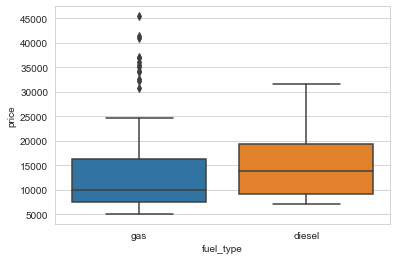

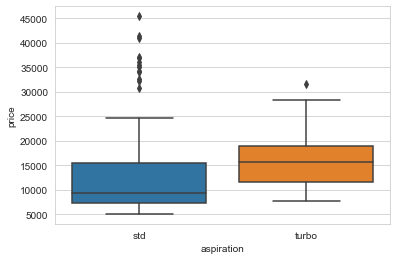

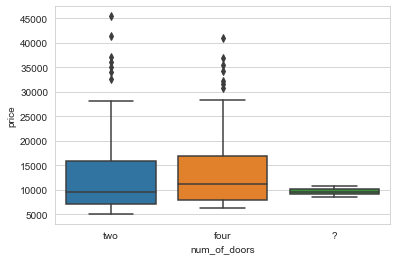

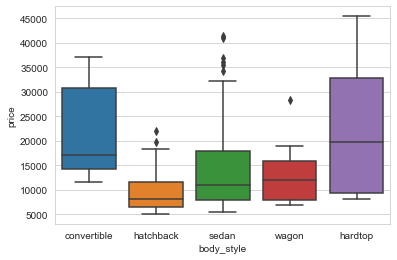

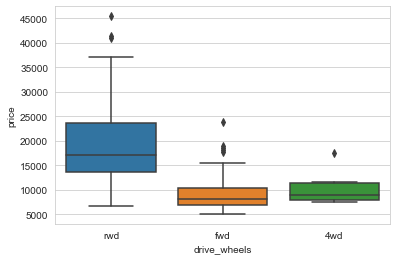

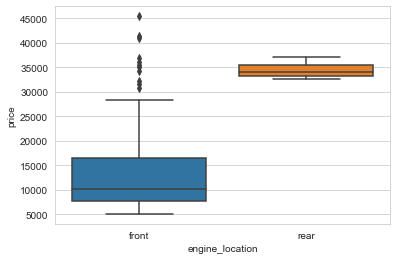

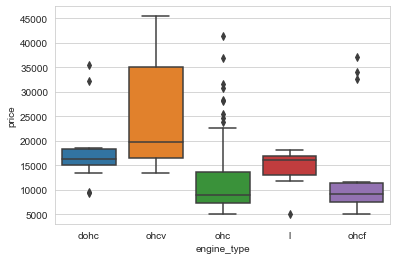

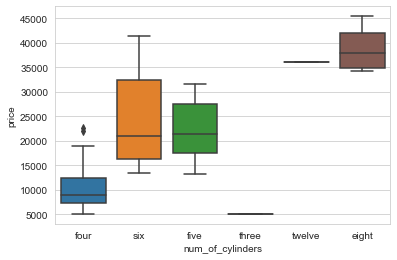

In [26]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Nombre para el eje x
        plt.ylabel(col_y)# Nombre para el eje y
        plt.show()
        
cat_cols = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders']
plot_box(auto_prices, cat_cols)    

Para cada variable categórica, puede ver que se crea un **diagrama de caja** para cada categoría única. Tenga en cuenta que para algunos de estos casos, existen algunas diferencias notables entre el precio de los automóviles por categoría. Por ejemplo, para **fuel_type** o **aspiration** hay diferencias notables. En otros casos, como **num_of_doors**, las diferencias no parecen significativas. Para **num_of_cylinders** hay diferencias significativas, pero hay dos categorías con un solo caso, lo cual es problemático.

El código en la celda de abajo crea una visualización similar a la anterior usando gráficos de violín. Ejecutamos el código y examinamos los resultados.

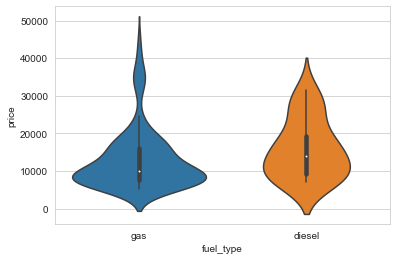

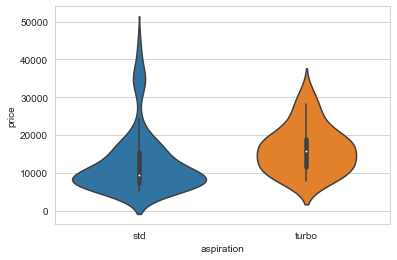

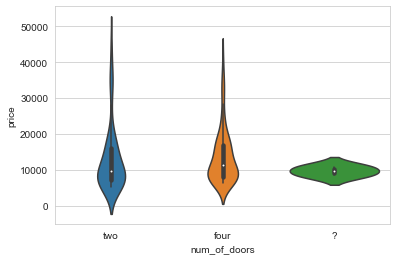

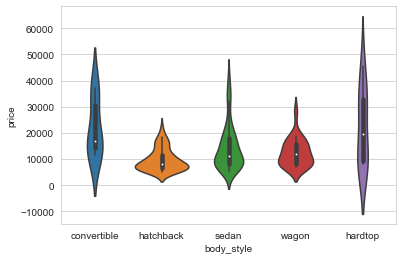

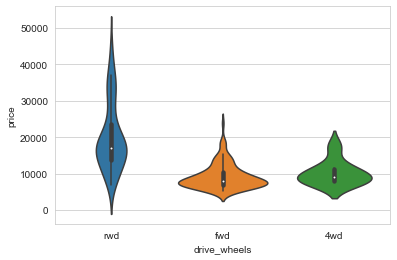

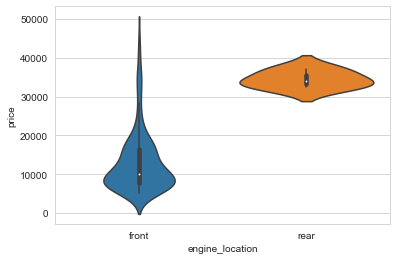

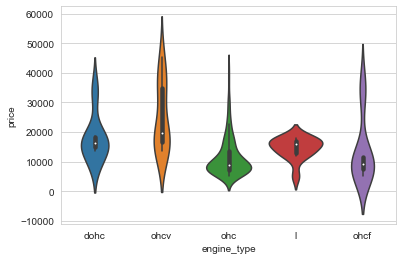

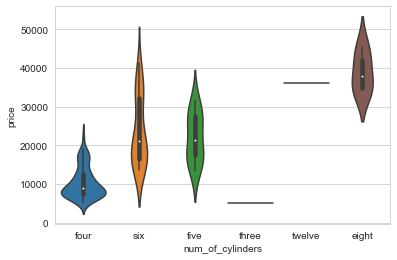

In [27]:
def plot_violin(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Nombre para el eje x
        plt.ylabel(col_y)# Nombre para el eje y
        plt.show()
        
plot_violin(auto_prices, cat_cols)    

La interpretación de los diagramas de violín es similar a los diagramas de caja. Sin embargo, es visible un poco más de detalle sobre las **distribuciones**. El área de cada violín es la misma en cada visualización de la trama. Notamos también que un tipo de diagrama de caja es visible dentro de cada diagrama de violín.

Al examinar los gráficos anteriores, observamos que algunas relaciones son más obvias. Por ejemplo, está bastante claro que el número de puertas no afecta el precio del automóvil y el estilo de la carrocería tiene una influencia marginal en el mejor de los casos. Considerando que, **engine_location** y **num_of_cylinders** afectan el precio.

## Usa la estética para agregar dimensiones adicionales al proyecto

Hasta ahora, ha trabajado con una o dos variables en un solo gráfico. Pero, con conjuntos de datos complejos, es útil ver múltiples dimensiones en cada gráfico. La pregunta es, ¿cómo se puede hacer esto cuando las pantallas gráficas están limitadas a dos dimensiones?

En esta sección, la estética de las formas se utiliza para proyectar dimensiones adicionales. Algunas estéticas son útiles solo para variables categóricas, mientras que otras son útiles para variables numéricas. Tenemos en cuenta que no todas las estéticas de la trama son igualmente efectivas. Las pruebas de las percepciones humanas han demostrado que las personas son muy buenas para notar pequeñas diferencias de posición. Este hecho explica por qué los diagramas de dispersión son tan efectivos. En orden aproximado de efectividad, estas estéticas son:
1. **Forma de marcador** es una categoría de variable indicadora efectiva. Es fundamental seleccionar formas que el espectador pueda distinguir fácilmente.
2. **Tamaño de marcador** muestra los valores de una variable numérica. Tenga cuidado, ya que el tamaño es el espacio a través del marcador, no el área.
3. ** Color de marcador ** es útil como indicador de categoría de variable. El color es la menos efectiva de estas tres estéticas en términos de percepción humana. Los colores deben elegirse para que parezcan distintos. Además, tenga en cuenta que muchas personas, especialmente los hombres, son daltónicos en rojo y verde.

La estética en una categórica, como la forma y el color del marcador, solo es eficaz si las diferencias en los marcadores son perceptibles. El uso de demasiadas formas o colores crea una situación en la que el espectador no puede distinguir las diferencias entre las categorías. Por lo general, se debe observar un límite de aproximadamente cinco a siete categorías.

### Forma de marcador

El código en la celda a continuación usa forma de marcador para mostrar el tipo de combustible del automóvil en un diagrama de dispersión. Esto se hace subconjuntando el marco de datos por cada valor único de la columna categórica. Las formas se definen en una lista, a la que se hace referencia en cada iteración de este bucle interno.

Hay un aspecto complicado en este código. El parámetro de transparencia, alpha, debe pasarse a Matplotlib a través de un diccionario. La clave es el argumento, alfa y el valor es el valor del argumento.

Ejecute este código y examine el resultado.

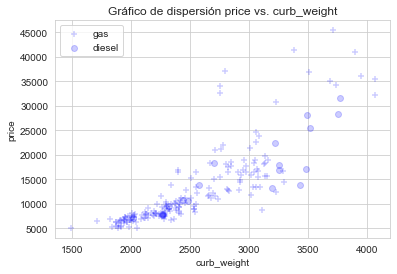

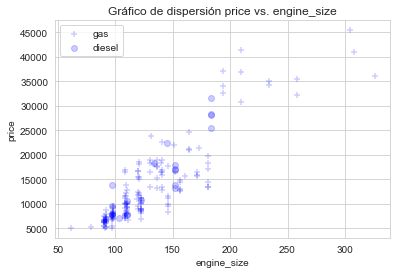

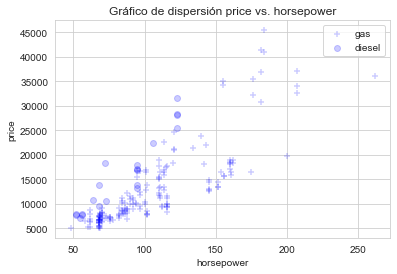

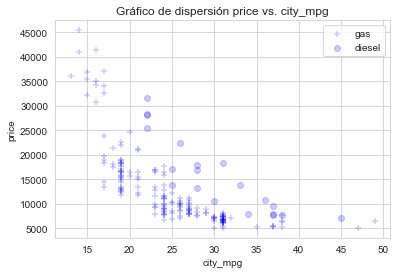

In [29]:
def plot_scatter_shape(auto_prices, cols, shape_col = 'fuel_type', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # formas para la visualización
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # búcle sobre las columnas para pasarlo al gráfico
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # búcle sobre las categorías unicas
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Gráfico de dispersión ' + col_y + ' vs. ' + col) # Título del gráfico
        plt.xlabel(col) # Nombre para x
        plt.ylabel(col_y)# Nombre para y
        plt.legend()
        plt.show()
            
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter_shape(auto_prices, num_cols)                

Si bien existe cierta superposición, las diferencias entre los automóviles a gasolina y diésel ahora son evidentes en estos gráficos. Esta nueva vista de los datos ayuda a confirmar y el tipo de combustible es una característica importante para determinar el precio del automóvil.

Tenga en cuenta que se han elegido formas bastante distintivas para esta pantalla. En resumen, al agregar forma por categoría, se proyecta una tercera dimensión en estas parcelas.

### Tamaño del marcador

El código en la celda a continuación usa el tamaño del marcador para mostrar el peso en vacío. Dado que Matplotlib usa el área para calcular el tamaño del marcador, los valores del peso en vacío se elevan al cuadrado y luego se escalan mediante un multiplicador conveniente. Observe que dado que size, `s`, es un argumento de Matplotlib, se pasa en un diccionario junto con alpha. Ejecute este código y examine los resultados.

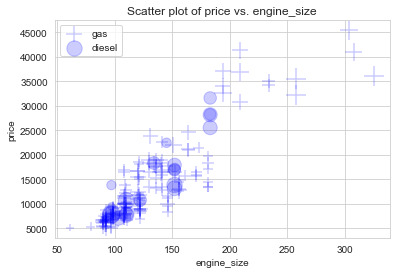

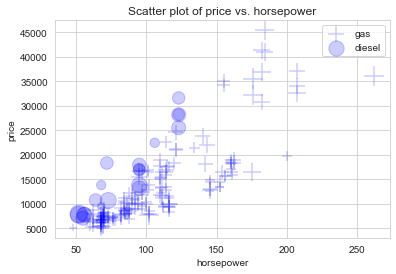

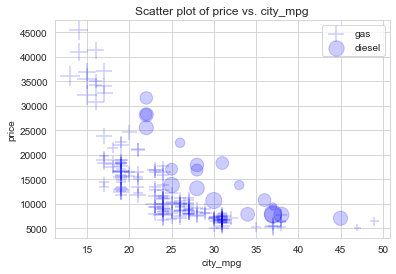

In [19]:
def plot_scatter_size(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                            size_mul = 0.000025, col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha, "s":size_mul*auto_prices[size_col]**2}, 
                        fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['engine_size', 'horsepower', 'city_mpg']
plot_scatter_size(auto_prices, num_cols)  

Hay varios aspectos interesantes de estos gráficos, cada uno de los cuales es útil para predecir el precio de los automóviles. Para los automóviles diésel, la relación entre peso_en vacío, precio, tamaño del motor, caballos de fuerza y ​​mpg_ciudad es compleja y no tiene una tendencia clara. Por otro lado, parece que los coches de precio alto, motor grande, alta potencia y city_mpg bajo tienen motores de gasolina grandes.

Las parcelas anteriores ahora proyectan cuatro dimensiones en la superficie de la parcela 2d.

### Color

Como ya se mencionó, los cambios de color son difíciles de percibir para muchas personas. No obstante, el color es útil para proyectar un número limitado de categorías de una variable. La elección del color distintivo ayuda a esta situación.

El código en la celda a continuación usa color para mostrar la categoría de **aspiración** del auto. Los dos bucles internos crean subconjuntos de datos que se trazan con una forma y un color específicos para los marcadores. Ejecute este código y examine los resultados.

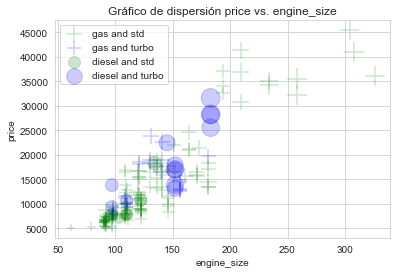

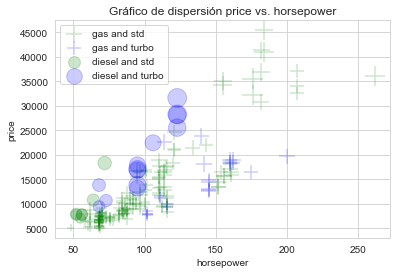

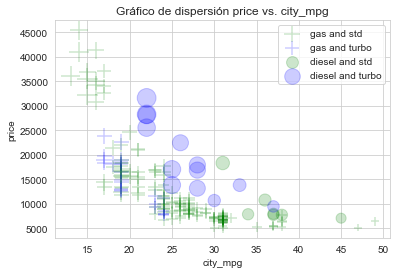

In [30]:
def plot_scatter_shape_size_col(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                            size_mul = 0.000025, color_col = 'aspiration', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # crea las formas
    colors = ['green', 'blue', 'orange', 'magenta', 'gray'] # define los colores
    unique_cats = auto_prices[shape_col].unique()
    unique_colors = auto_prices[color_col].unique()
    for col in cols: # se hace un bucle sobre las columnar sobre el gráfico
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # se hace un loop sobre las categorias únicas
            for j, color in enumerate(unique_colors):
                temp = auto_prices[(auto_prices[shape_col] == cat) & (auto_prices[color_col] == color)]
                sns.regplot(col, col_y, data=temp, marker = shapes[i],
                            scatter_kws={"alpha":alpha, "s":size_mul*temp[size_col]**2}, 
                            label = (cat + ' and ' + color), fit_reg = False, color = colors[j])
        plt.title('Gráfico de dispersión ' + col_y + ' vs. ' + col) # Da nombre al gráfico
        plt.xlabel(col) # Nombre para el eje x
        plt.ylabel(col_y)# Nombre para el eje y
        plt.legend()
        plt.show()

num_cols = ['engine_size', 'horsepower', 'city_mpg']        
plot_scatter_shape_size_col(auto_prices, num_cols)     

Cada uno de estos gráficos proyecta cinco dimensiones de datos en la pantalla 2d. Varias relaciones son ahora evidentes en estos datos.

En resumen, la **aspiración** junto con el **tipo de combustible** deberían ser predictores útiles del precio.

El color (o tono) se puede utilizar en otros tipos de gráficos. Por ejemplo, el código de la celda siguiente muestra parcelas de violín divididas. Los violines se dividen por tipo de aspiración y se muestran en diferentes colores. Ejecute este código y examine los resultados.

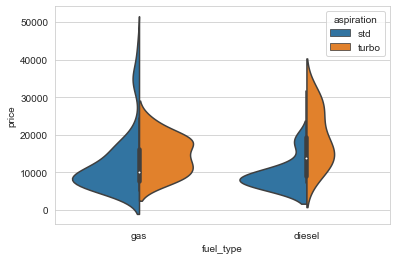

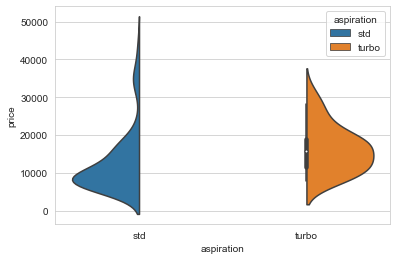

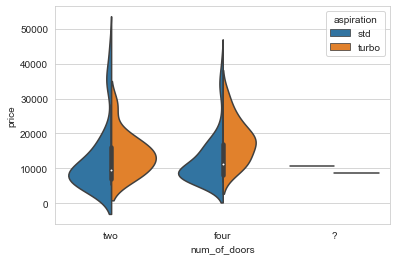

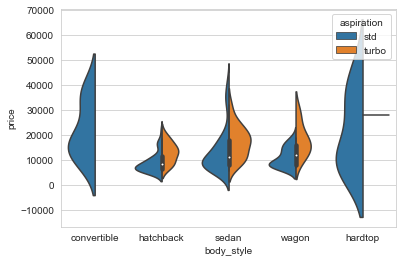

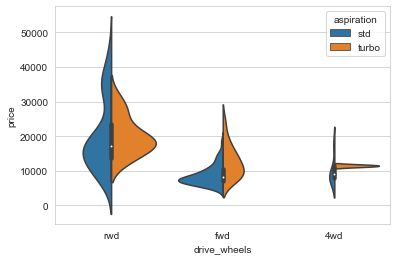

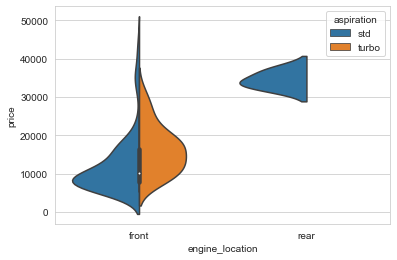

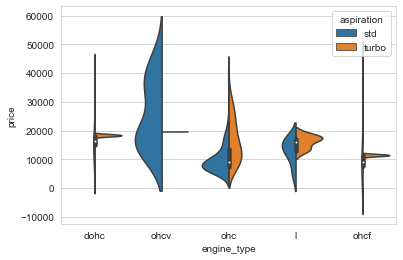

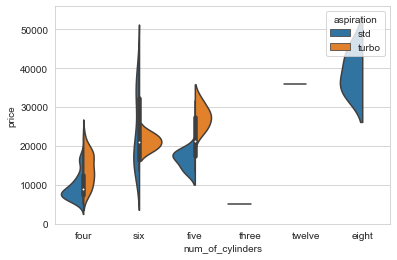

In [31]:
def plot_violin_hue(auto_prices, cols, col_y = 'price', hue_col = 'aspiration'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=auto_prices, hue = hue_col, split = True)
        plt.xlabel(col) # Nombre de x
        plt.ylabel(col_y)# Nombre de y
        plt.show()
        
plot_violin_hue(auto_prices, cat_cols)    

Estos gráficos muestran que los autos con aspiración turbo son generalmente más costosos que los autos estándar comparables. Por tanto, la aspiración debería ser un predictor útil del precio.

## Vistas de datos de varios ejes

Hasta ahora, ha estado trabajando con gráficos con un solo par de ejes. Sin embargo, es muy posible crear potentes visualizaciones de datos con múltiples ejes. Estos métodos le permiten examinar las relaciones entre muchas variables en una vista. Estas vistas múltiples ayudan a comprender las muchas relaciones en conjuntos de datos complejos. Hay varios métodos de trazado potentes de varios ejes. En este laboratorio trabajará con dos métodos que se aplican comúnmente:
1. **Gráficos de dispersión por pares** o **matrices de gráficos de dispersión** son una matriz de gráficos de dispersión con ejes comunes a lo largo de las filas y columnas de la matriz. La diagonal de la matriz se puede utilizar para mostrar gráficos de distribución. Las celdas por encima o por debajo de la diagonal se pueden utilizar para otros tipos de gráficos, como los gráficos de densidad de contorno.
2. **Gráficas condicionadas**, **gráficas facetadas** o **pequeñas gráficas múltiples** utilizan operaciones **agrupar por** para crear y mostrar subconjuntos del conjunto de datos. La pantalla puede ser una matriz unidimensional o bidimensional organizada por las agrupaciones del conjunto de datos.

### Diagrama de dispersión por pares

Ahora aplicará una matriz de gráfico de dispersión al conjunto de datos auto.price. El código de la celda siguiente usa la función `pairplot` del paquete Seaborn. Esta función crea una matriz de gráfico de dispersión básica debajo de la diagonal. Las estimaciones de densidad de kernel de cada variable se muestran en diagonal. Usando el método `map_upper`, las parcelas de densidad 2D se muestran sobre la diagonal. Ejecutamos la celda a continuación para crear una matriz de diagrama de dispersión de las características numéricas en el conjunto de datos.

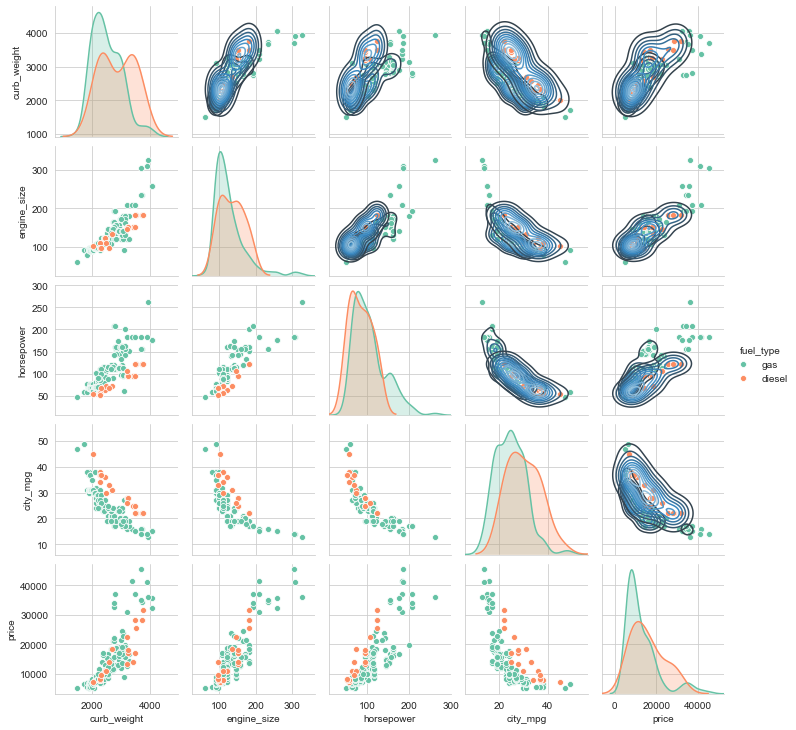

In [33]:
num_cols = ["curb_weight", "engine_size", "horsepower", "city_mpg", "price", "fuel_type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel_type', palette="Set2", diag_kind="kde", height=2).map_upper(sns.kdeplot, cmap="Blues_d")

Revise la matriz del gráfico de dispersión (si el gráfico es demasiado grande para la celda, puede expandir la celda haciendo clic en su margen izquierdo).

Hay que tener en cuenta que este gráfico se compone de varios gráficos de dispersión. Para cada variable hay una fila y una columna. La variable se traza en el eje vertical en la fila y en el eje horizontal en la columna. De esta manera, cada combinación de gráficos cruzados para todas las variables se muestra en ambas orientaciones posibles. Los gráficos de KDE para cada variable están en diagonal. Por encima de la diagonal puede ver diagramas de contorno de estimaciones de densidad 2D. Aquí hay muchos detalles.

Examine la matriz de gráficos de dispersión anterior, que muestra los gráficos de cada columna numérica frente a cada otra columna numérica, y observe lo siguiente:
- Muchas características muestran una colinealidad significativa, como caballos de fuerza, tamaño del motor y peso en vacío. Esto sugiere que no se deben usar todas estas funciones al entrenar un modelo de aprendizaje automático.
- Todas las características muestran una fuerte relación con la etiqueta, el precio, como city_mpg, engine_size, horsepower y curb_weight.
- Varias de estas relaciones son no lineales, en particular las relaciones con la función city_mpg.
- Hay un comportamiento distintivamente diferente para el diesel vs. coches de gas.
- La mayoría de las variables tienen distribuciones asimétricas.

Muchas de estas relaciones se han señalado anteriormente. Tener toda esta información en una parcela puede resultar útil. Sin embargo, puede notar que algunos detalles son difíciles de ver en tal pantalla.

****
Nota: El número de diagramas de dispersión y la memoria necesaria para calcularlos y mostrarlos pueden ser un poco abrumadores. Es posible que desee hacer una matriz de diagrama de dispersión con menos columnas. Por ejemplo, puede eliminar columnas que son colineales con otras columnas.
****

### Sectores acondicionadas

Ahora exploraremos el uso de parcelas acondicionadas. El código en la celda a continuación hace lo siguiente:
1. La función Seaborn `FacetGrid` define el objeto de cuadrícula sobre el que se muestran los gráficos. Los argumentos de esta función son el marco de datos de Pandas y las variables de agrupación para las filas y columnas.
2. El método `map` muestra (mapea) la función del gráfico sobre la cuadrícula del gráfico. En este caso, se utiliza la función de histograma, `hist`, de Matplotlib.

Ejecute el código y examine los resultados.

'drive_wheels'

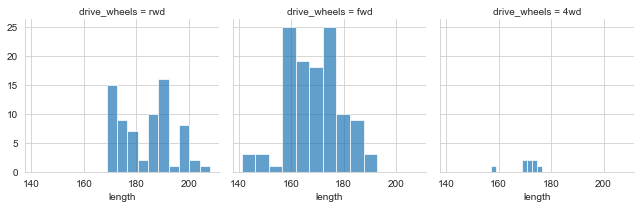

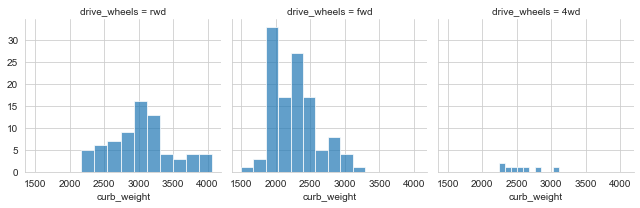

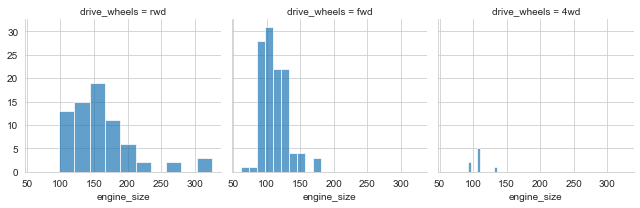

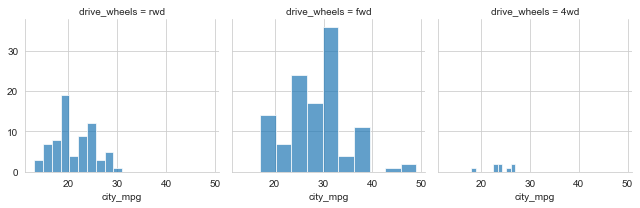

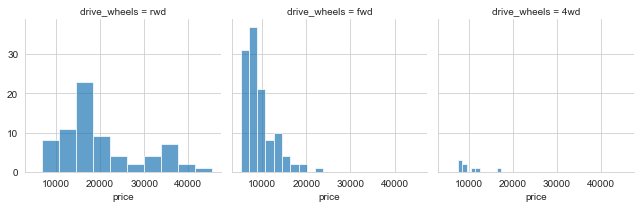

In [34]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## búble sobre la lista de columnas
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define las columnas para realizar un histograma condicional
plot_cols2 = ["length",
               "curb_weight",
               "engine_size",
               "city_mpg",
               "price"]

cond_hists(auto_prices, plot_cols2, 'drive_wheels')

Examine esta serie de gráficos condicionados. Existe una diferencia constante en las distribuciones de las características numéricas condicionadas a las categorías de drive_wheels.

A continuación, se creará y se examinará diagramas de dispersión condicionados. Al condicionar varias dimensiones, puede proyectar varias dimensiones adicionales en la gráfica bidimensional. El acondicionamiento se puede considerar como una operación de grupo.

No utilizará la forma del punto como diferenciador en este ejercicio, pero tenga en cuenta que la forma puede ser tan útil como el color. Además, la forma puede ser más fácil para la fracción significativa de la población daltónica.

Nota: Tenga cuidado al combinar métodos para proyectar múltiples dimensiones. Puede terminar fácilmente con una trama que no solo es difícil de interpretar, sino aún más difícil para usted comunicar sus observaciones a sus colegas. Por ejemplo, si usa tres variables condicionantes, más color y forma, está proyectando siete dimensiones de su conjunto de datos. Si bien este enfoque puede revelar relaciones importantes, puede crear una trama compleja.

El código en la celda a continuación usa el paquete Python seaborn para crear una matriz bidimensional de diagramas de dispersión de la siguiente manera:
1. Como antes, se define el objeto de cuadrícula. Se utiliza una estética de color con la paleta especificada.
2. Los diagramas de dispersión se asignan a la cuadrícula.

Ejecute este código y examine los resultados.

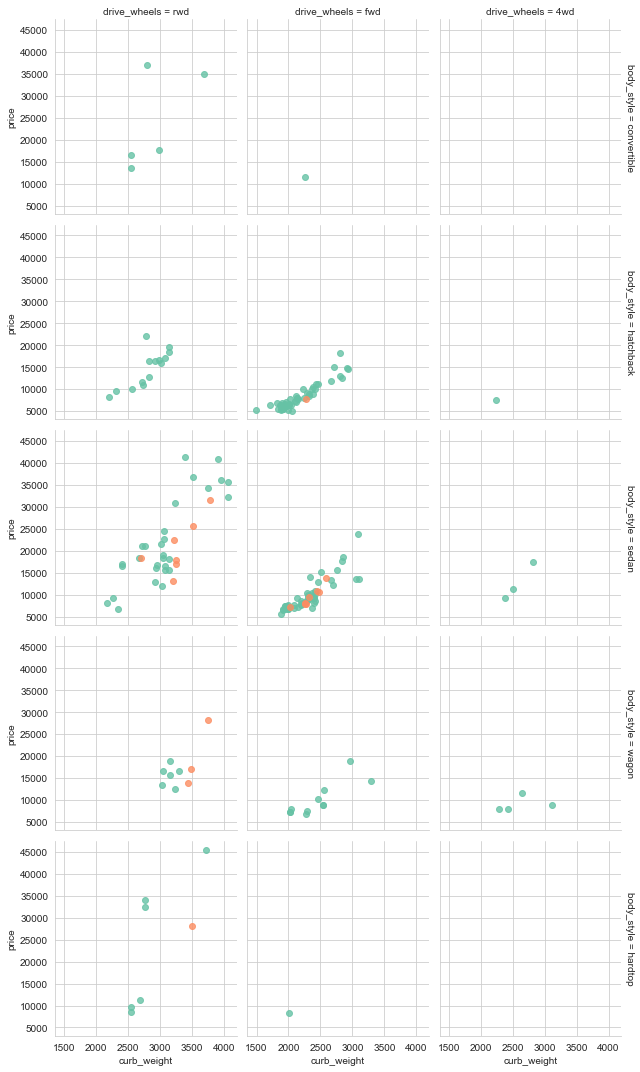

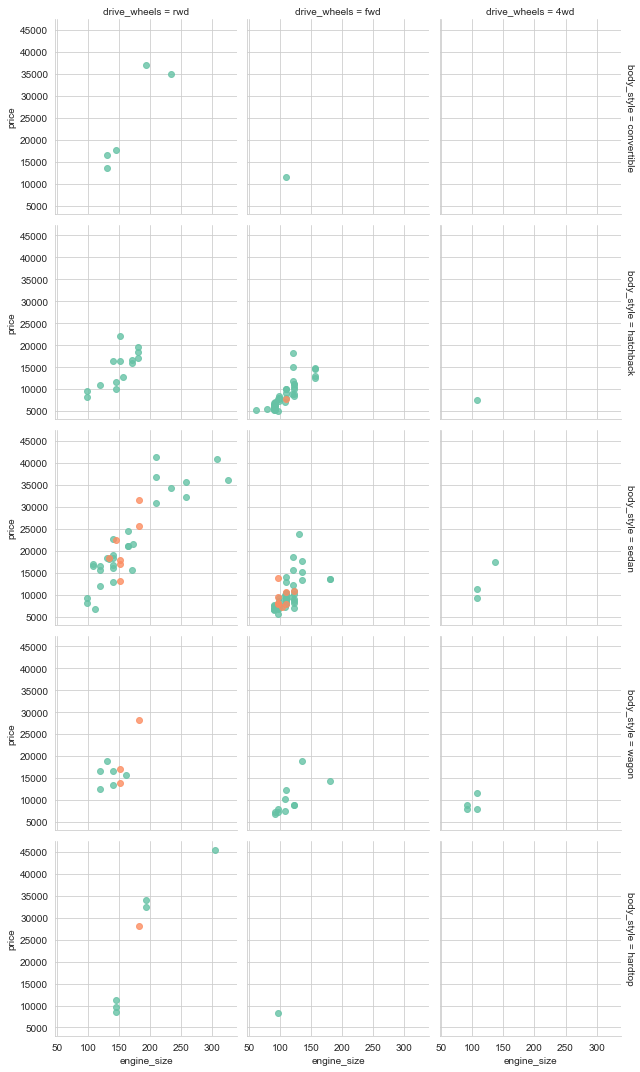

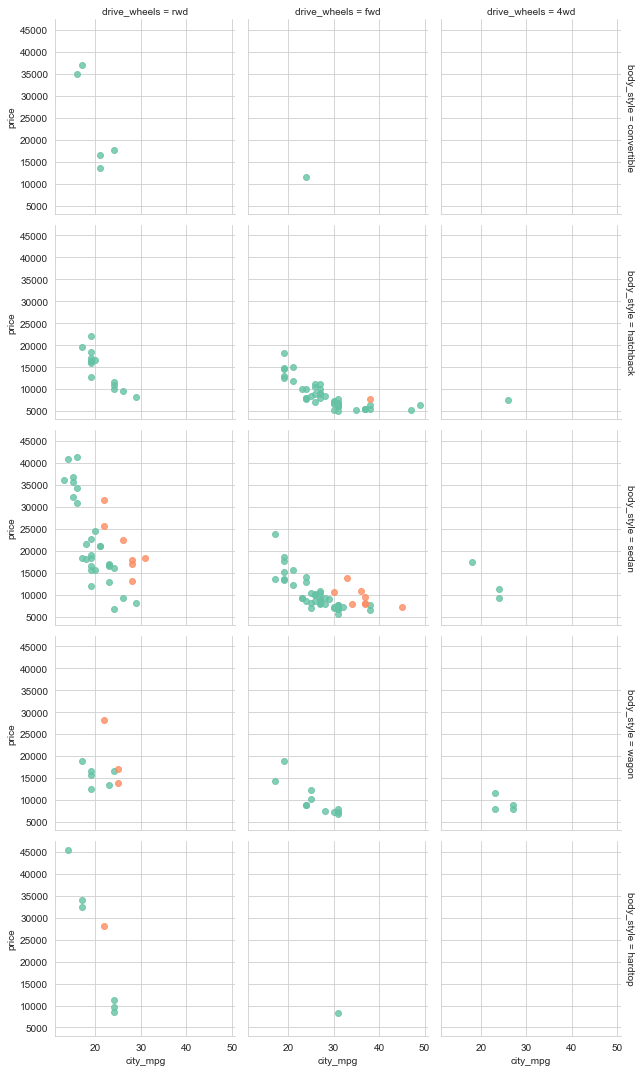

In [36]:
def cond_plot(cols):
    import ipywidgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(auto_prices, col="drive_wheels", row = 'body_style', 
                      hue="fuel_type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)

num_cols = ["curb_weight", "engine_size", "city_mpg"]
cond_plot(num_cols)    

Examinamos cuidadosamente los gráficos que se han creado. Estos gráficos muestran un total de cinco dimensiones de los datos y hay muchos detalles que comprender. 

Como mínimo, deberiamos poder concluir lo siguiente:
- No hay coches para algunas combinaciones de variables de **acondicionamiento**. Por ejemplo, no hay convertibles ni techos rígidos con tracción en las 4 ruedas. Como resultado, estos gráficos están en blanco.
- No hay vehículos diésel para algunas de las combinaciones de acondicionamiento, como convertibles y vehículos con tracción en las 4 ruedas.
- Hay una serie de agrupaciones distintas. Por ejemplo, los sedanes o vagones de tracción delantera y trasera tienen comportamientos claramente diferentes.

Nuevamente, muchas de estas observaciones se pueden realizar con otros tipos de gráficos. Sin embargo, existe la ventaja de disponer estos gráficos en subgrupos de los conjuntos de datos. Diferentes subgrupos de datos resaltan diferentes relaciones de los datos.

## Resumen

A estas alturas, deberiamos darnos cuenta de que explorar un conjunto de datos en detalle es una tarea abierta y compleja. Es posible que desee probar otras combinaciones de variables condicionantes y variables de color para encontrar otras relaciones interesantes en estos datos. Solo mediante el uso de múltiples vistas con diferentes tipos de gráficos puede desarrollar verdaderamente una comprensión de las relaciones en datos complejos.

Un desafío constante en la visualización de conjuntos de datos complejos es la limitación de las proyecciones 2D. La estética y los métodos de múltiples ejes permiten la proyección de dimensiones más altas en la superficie de la parcela 2D.

Específicamente en este laboratorio, usted:

1. Usó estadísticas de resumen para comprender los conceptos básicos de un conjunto de datos.
2. Usó varios tipos de gráficos para mostrar distribuciones.
3. Creé diagramas de dispersión con diferente transparencia.
4. Se utilizaron parcelas de densidad y parcelas de contenedores hexagonales para superar la sobreparcela.
5. Estética aplicada para proyectar dimensiones adicionales de variables categóricas y numéricas en una superficie de parcela 2d.
6. Se utilizaron diagramas de dispersión por pares y diagramas acondicionados para crear pantallas con múltiples ejes.